In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.datasets import load_digits  #MNIST 손글씨

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
dataset = load_digits()
print(dataset.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [6]:
dataset = load_digits()
print(dataset.keys())

X = dataset.data    #이미지 0~255 픽셀값
y = dataset.target  #숫자값 0~9
print(X.shape, y.shape)
print(X[0], y[0])

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
(1797, 64) (1797,)
[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]] 0


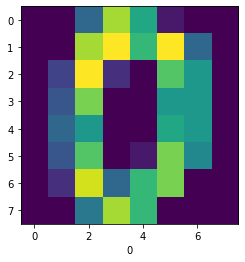

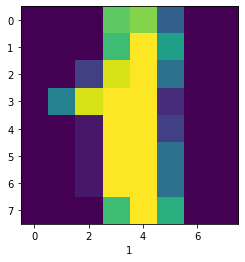

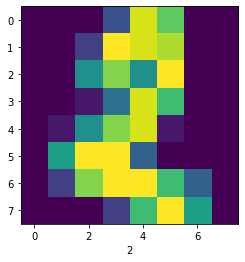

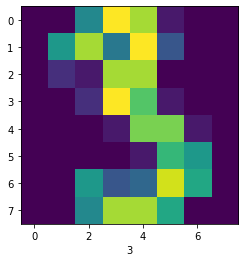

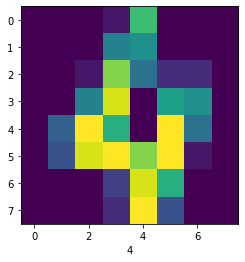

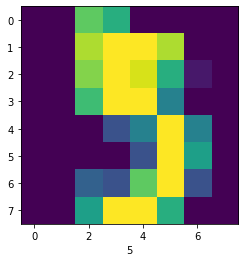

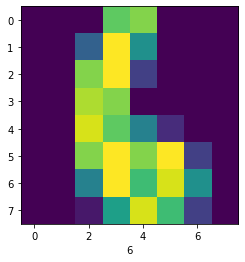

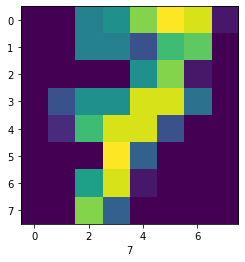

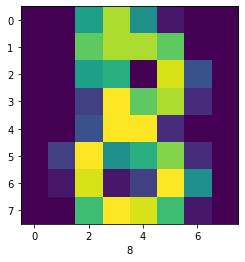

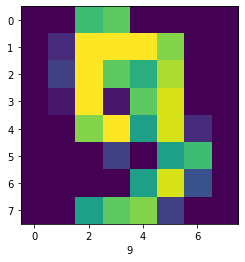

In [10]:
# np.array 64  --> 8*8
for i in range(0,10):
    plt.imshow(  np.reshape(X[i],(8,8))  )
    plt.xlabel(y[i])
    plt.show()

In [11]:
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=111)
print(X_train.shape,X_test.shape, y_train.shape,y_test.shape )


(1437, 64) (360, 64) (1437,) (360,)


## NN 모델로 변경

In [ ]:
# input layer  -  hidden layer(2) -  output layer
#                 LeRU               softmax
# w1x1 + w2x2.....w64x64 + b     

In [13]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      0.97      0.99        39
           2       1.00      1.00      1.00        32
           3       0.97      0.97      0.97        35
           4       0.95      0.95      0.95        38
           5       0.94      0.89      0.91        35
           6       0.97      0.97      0.97        38
           7       0.90      1.00      0.95        38
           8       1.00      0.92      0.96        36
           9       0.91      0.97      0.94        33

    accuracy                           0.96       360
   macro avg       0.97      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360



## 정규화

In [19]:
# scaler = StandardScaler()
# X_train_sacle = scaler.fit_transform(X_train)
# X_test_sacle = scaler.fit_transform(X_test)
# model.fit(X_train_sacle.reshape(-1,1), y_train)
# pred = model.fit(X_test_sacle.reshape(-1,1))
# report = classification_report(y_test, pred)
# print(report)



scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_scaler, y, test_size=0.2, random_state=160)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
print("정규화 후 점수 확인------\n")
report = classification_report(y_test, pred)
print(report)



정규화 후 점수 확인------

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.93      1.00      0.96        27
           2       1.00      1.00      1.00        36
           3       0.95      1.00      0.98        40
           4       0.97      0.97      0.97        31
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        33
           7       0.97      0.97      0.97        34
           8       1.00      0.90      0.95        41
           9       0.96      0.98      0.97        46

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



## GridSearchCV

In [25]:
from sklearn.model_selection import GridSearchCV
#cross_val_score +  param_grid(튜닝) / refit=True(best모델반영)
model = RandomForestClassifier()
myparam = {'max_depth':[1,3,5,7], 'min_samples_split':[1,2,3]}
GCV_model = GridSearchCV(model, param_grid=myparam, refit=True, cv=5, scoring='f1_macro',verbose=0)
GCV_model.fit(X_train, y_train)

#max_depth 4번 * min_samples_split 3번 * cv=5  = 총 60번 학습
print(GCV_model.best_score_)
print(GCV_model.best_estimator_)
print(GCV_model.best_params_)
# refit=True 속성때문에 GCV_model에 최적 파라미터가 모두 반영된 상태다
pred = GCV_model.predict(X_test)
print("GridSearchCV cv=, 튜닝 후 점수 확인------\n")
report = classification_report(y_test, pred)
print(report)


0.9642015730589065
RandomForestClassifier(max_depth=7)
{'max_depth': 7, 'min_samples_split': 2}
GridSearchCV cv=, 튜닝 후 점수 확인------

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.93      1.00      0.96        27
           2       0.97      1.00      0.99        36
           3       0.97      0.93      0.95        40
           4       0.97      0.97      0.97        31
           5       0.97      1.00      0.98        30
           6       1.00      1.00      1.00        33
           7       0.92      0.97      0.94        34
           8       0.94      0.83      0.88        41
           9       0.94      0.98      0.96        46

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

